# The `Titanic` dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
seed = 42
df = pd.read_csv('datasets/titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Schema of the dataset

|Attribute|Description|Value|
|---------|-----------|-----|
|survival| 	Survival| 	0 = No, 1 = Yes|
|pclass| 	Ticket class| 	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex| 	Sex 	||
|Age| 	Age in years| 	|
|sibsp| 	# of siblings / spouses aboard the Titanic |	|
|parch| 	# of parents / children aboard the Titanic 	||
|ticket| 	Ticket number 	||
|fare| 	Passenger fare 	||
|cabin| 	Cabin number 	||
|embarked| 	Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton |

# Profiling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Plot `Survived`

<Axes: >

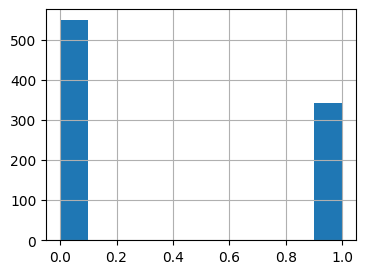

In [5]:
fig, ax = plt.subplots(figsize=(4, 3))
df['Survived'].hist(ax=ax)

# Pre-processing

# Encoding `Sex`

<Axes: >

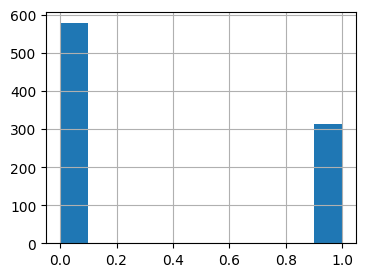

In [6]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
fig, ax = plt.subplots(figsize=(4, 3))
df['Sex'].hist(ax=ax)

# Imputing `Age`

In [7]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

# Encoding `Embarked`

In [8]:
embarked_one_hot = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_one_hot], axis=1)
df = df.drop('Embarked', axis=1)

In [9]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891.0,NaN,NaN,NaN,0.352413,0.47799,0.0,0.0,0.0,1.0,1.0
Age,891.0,NaN,NaN,NaN,29.699118,13.002015,0.42,22.0,29.699118,35.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


# Dropping useless columns

In [10]:
df = df.drop(['Name', 'PassengerId', 'Cabin', 'Ticket'], axis=1)

# Checking data distribution

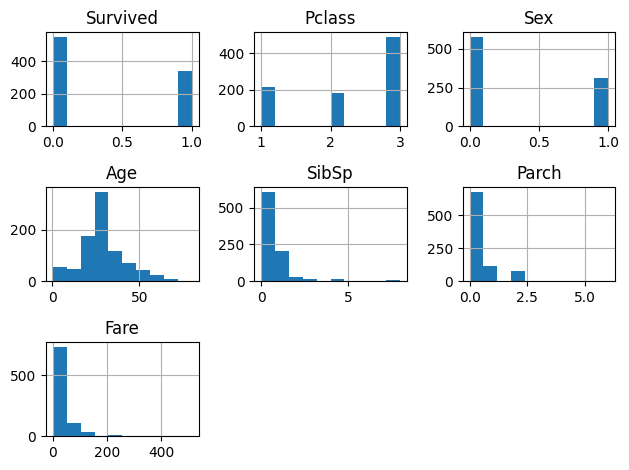

In [11]:
df.hist()
plt.tight_layout()

# Correlation matrix

<Axes: >

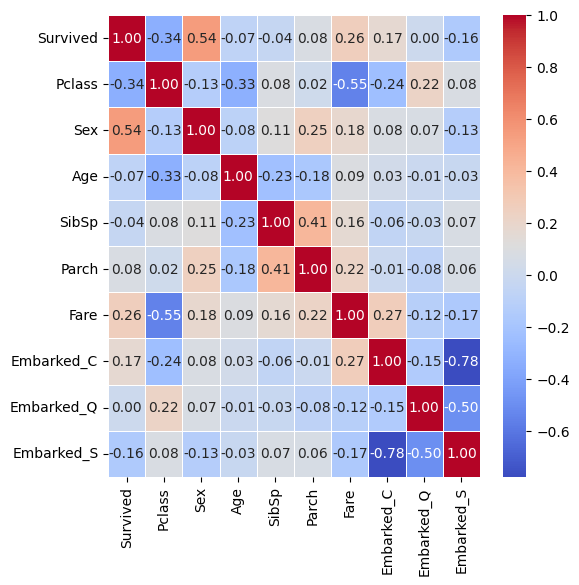

In [12]:
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Checking correlation with survived

Text(0.5, 1.0, 'Correlation with Survival')

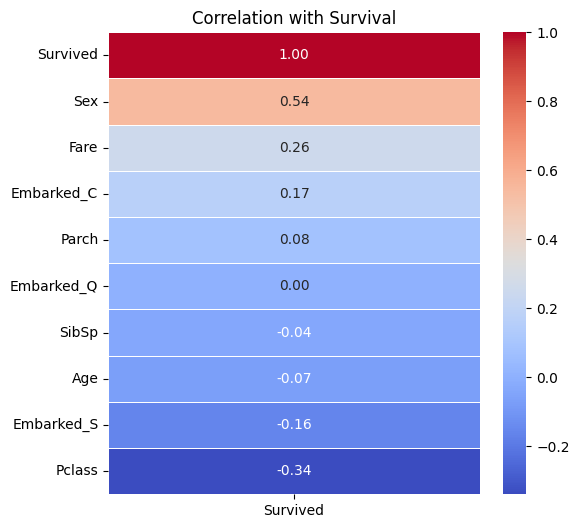

In [13]:
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix[['Survived']].sort_values(by="Survived", ascending=False), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation with Survival')

# Plotting the data (PCA)

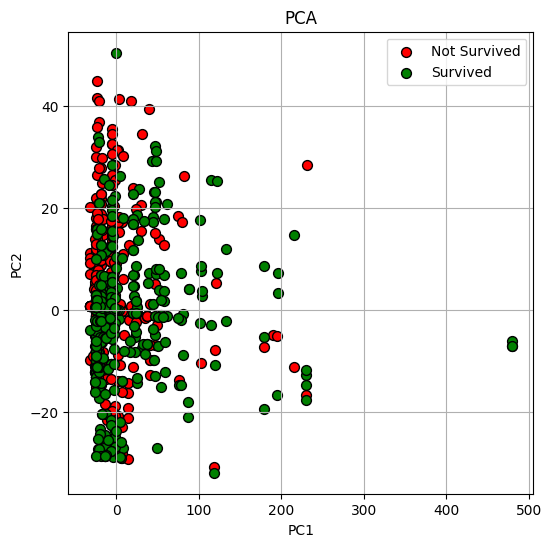

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
X = df.drop(['Survived'], axis=1)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, df[['Survived']]], axis = 1)
fig, ax = plt.subplots(figsize = (6, 6))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA')
targets, colors = [0, 1], ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Survived'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], finalDf.loc[indicesToKeep, 'PC2'], c = color, s = 50, edgecolor='k')
ax.legend(['Not Survived', 'Survived'])
ax.grid()

# Plotting the data (T-SNE)

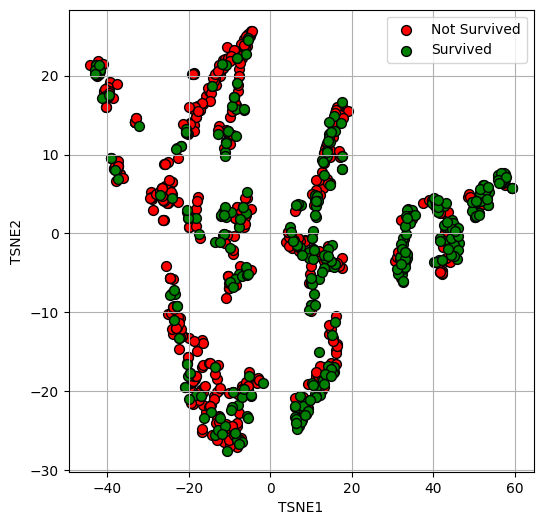

In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=seed)
tsne_results = tsne.fit_transform(X)
finalDf = pd.DataFrame({'TSNE1': tsne_results[:, 0], 'TSNE2': tsne_results[:, 1], 'Survived': df['Survived']})
fig, ax = plt.subplots(figsize = (6, 6))
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Survived'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'TSNE1'], finalDf.loc[indicesToKeep, 'TSNE2'], c = color, s = 50, edgecolor='k')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
ax.legend(['Not Survived', 'Survived'])
ax.grid()

# Compute a decision tree

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
X, y = df.drop('Survived', axis=1), df['Survived']

def train_tree(X, y, X_test=None, y_test=None):
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [3, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }
    clf = DecisionTreeClassifier(random_state=seed)
    random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter=100, cv=5, scoring='accuracy', random_state=seed, error_score='raise')
    random_search.fit(X, y)
    best_clf = random_search.best_estimator_
    print("Best Classifier:", best_clf)
    test_score = None
    if X_test is not None:
        y_pred = best_clf.predict(X_test)
        test_score = accuracy_score(y_test, y_pred)
    return best_clf, float(random_search.best_score_), test_score

best_clf, train_score, test_score = train_tree(X, y)
train_score, test_score

Best Classifier: DecisionTreeClassifier(max_depth=10, max_features='log2', random_state=42)


e:\OneDrive - Alma Mater Studiorum Università di Bologna\teaching-bigdata\AA2425-unibo-mldm\slides\venv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


(0.8193522063900571, None)

# Understanding feature relevance

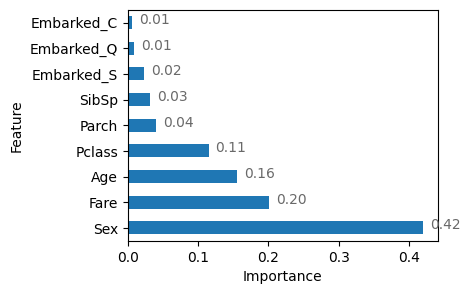

In [17]:
def feature_relevance(best_clf, X):
    feature_importances = pd.Series(best_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
    # print(f"Feature Importance: \n{feature_importances}")
    fig, ax = plt.subplots(figsize=(4, 3))
    feature_importances.plot(kind='barh', ax=ax)
    for i in ax.patches: ax.text(i.get_width() + 0.01, i.get_y() + 0.2, f'{i.get_width():.2f}', fontsize=10, color='dimgrey')
    ax.set_xlabel('Importance')
    ax.set_ylabel('Feature')

feature_relevance(best_clf, X)

# Plot `Survived` by `Sex`

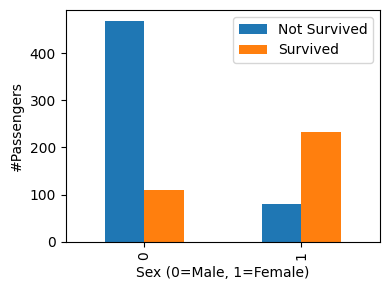

In [18]:
survived_by_sex = df.groupby(['Sex', 'Survived'])['Survived'].count().unstack()
survived_by_sex.plot(kind='bar', figsize=(4, 3))
plt.xlabel('Sex (0=Male, 1=Female)')
plt.ylabel('#Passengers')
plt.legend(['Not Survived', 'Survived'])
plt.tight_layout()

# Training a random forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

def train_forest(X, y, X_test=None, y_test=None):
    param_grid_rf = {
        'n_estimators': [5, 10, 100, 200, 300],
        'max_depth': [3, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }
    rf_clf = RandomForestClassifier(random_state=seed)
    random_search_rf = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_grid_rf, n_iter=100, cv=5, scoring='accuracy', random_state=seed)
    random_search_rf.fit(X, y)
    best_rf_clf = random_search_rf.best_estimator_
    print("Best Classifier:", best_rf_clf)
    test_score = None
    if X_test is not None:
        y_pred = best_clf.predict(X_test)
        test_score = accuracy_score(y_test, y_pred)
    return best_rf_clf, float(random_search_rf.best_score_), test_score

best_clf, train_score, test_score = train_forest(X, y)
train_score, test_score

Best Classifier: RandomForestClassifier(max_depth=15, max_features='log2', min_samples_split=5,
                       n_estimators=300, random_state=42)


(0.8339150084740442, None)

# Feature engineering

In [20]:
def preprocess(df):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['FarePerPerson'] = df['Fare'] / df['FamilySize']
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss').replace('Ms', 'Miss').replace('Mme', 'Mrs')
    
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    df['Age']=df['Age'].fillna(df['Age'].mean())
    df['Age'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teenager', 'Young', 'Adult', 'Senior'])
    
    df = pd.get_dummies(df, columns=['Title', 'Age', "Embarked"])  # , drop_first=True
    df = df.drop(['Name', 'PassengerId', 'Cabin', 'Ticket'], axis=1)
    return df, df.drop('Survived', axis=1), df['Survived']

df, X, y = preprocess(pd.read_csv('datasets/titanic/train.csv'))
# X_test, y_test = preprocess(pd.read_csv('datasets/titanic/test.csv'))

# Retraining the decision tree

In [21]:
best_clf, train_score, test_score = train_tree(X, y)
train_score, test_score

Best Classifier: DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_leaf=2, random_state=42)


(0.8204067541271733, None)

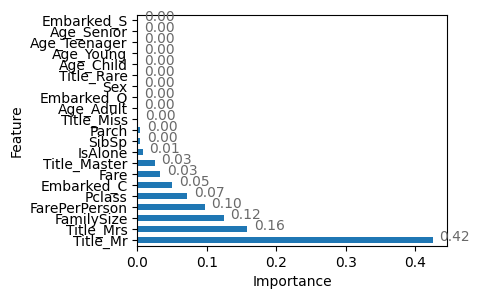

In [22]:
feature_relevance(best_clf, X)

# Retraining the random forest

In [23]:
best_clf, train_score, test_score = train_forest(X, y)
train_score, test_score

Best Classifier: RandomForestClassifier(max_depth=5, n_estimators=5, random_state=42)


(0.8316615403929445, None)

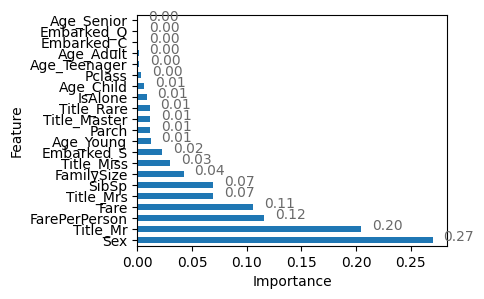

In [24]:
feature_relevance(best_clf, X)

# Some insights

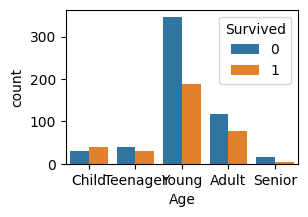

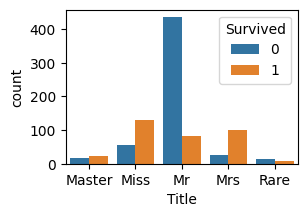

In [32]:
import seaborn as sns

def plot(df, prefix):
    columns = [col for col in df.columns if col.startswith(prefix)]
    melted_df = df.melt(id_vars=['Survived'], value_vars=columns, var_name=prefix, value_name='Value')
    melted_df = melted_df[melted_df["Value"]].drop("Value", axis=1)
    melted_df[prefix] = melted_df[prefix].replace(prefix + "_", "", regex=True)
    plt.figure(figsize=(3, 2))
    sns.countplot(data=melted_df, x=prefix, hue='Survived')
    plt.legend(title='Survived', loc='upper right')

for x in ["Age", "Title"]: plot(df, x)

In [26]:
from sklearn.neural_network import MLPClassifier

def train_mlp(X, y, X_test=None, y_test=None):
    param_grid = {
        'hidden_layer_sizes': [(100), (10, 10), (10, 10, 10)],
        'activation': ["tanh", "relu"],
        "max_iter": [100, 1000, 10000],
        "learning_rate_init": [0.001, 0.01, 0.1],
        "solver": ["adam", "sgd"]
    }
    nn = MLPClassifier(random_state=seed)
    random_search = RandomizedSearchCV(estimator=nn, param_distributions=param_grid, n_iter=100, cv=5, scoring='accuracy', random_state=seed)
    random_search.fit(X, y)
    best = random_search.best_estimator_
    print("Best Classifier:", best)
    test_score = None
    if X_test is not None:
        y_pred = best_clf.predict(X_test)
        test_score = accuracy_score(y_test, y_pred)
    return best, float(random_search.best_score_), test_score

best_clf, train_score, test_score = train_mlp(X, y)
train_score, test_score

Best Classifier: MLPClassifier(hidden_layer_sizes=100, max_iter=100, random_state=42)


(0.8293955181721172, None)

# Running AutoML

In [27]:
from flaml import AutoML

automl_settings = {
    "time_budget": 60,  # in seconds
    "metric": "accuracy",
    "task": "classification",
}

automl = AutoML()
automl.fit(X, y, **automl_settings)

[flaml.automl.logger: 11-12 17:13:39] {1728} INFO - task = classification
[flaml.automl.logger: 11-12 17:13:39] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 11-12 17:13:39] {1838} INFO - Minimizing error metric: 1-accuracy


[flaml.automl.logger: 11-12 17:13:39] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']
[flaml.automl.logger: 11-12 17:13:39] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 11-12 17:13:39] {2393} INFO - Estimated sufficient time budget=1852s. Estimated necessary time budget=43s.
[flaml.automl.logger: 11-12 17:13:39] {2442} INFO -  at 0.2s,	estimator lgbm's best error=0.2166,	best estimator lgbm's best error=0.2166
[flaml.automl.logger: 11-12 17:13:39] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 11-12 17:13:39] {2442} INFO -  at 0.4s,	estimator lgbm's best error=0.2166,	best estimator lgbm's best error=0.2166
[flaml.automl.logger: 11-12 17:13:39] {2258} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 11-12 17:13:40] {2442} INFO -  at 0.5s,	estimator lgbm's best error=0.1773,	best estimator lgbm's best error=0.1773
[flaml.automl.logger: 11-12 17:13:40] {

In [29]:
automl.model.estimator

ExtraTreesClassifier(criterion=np.str_('gini'),
                     max_features=np.float64(0.14767434400801147),
                     max_leaf_nodes=17, n_estimators=23, n_jobs=-1,
                     random_state=12032022)

# Can you do better?

In [28]:
# Write your code here